In [1]:
# # jupyter magic commands in order to set everything up.
%autosave 0
%load_ext autoreload
%autoreload 2
%matplotlib notebook

Autosave disabled


In [2]:
# Install the package
%pip install git+https://github.com/fchouteau/isae-practical-deep-learning.git#egg=khumeia\&subdirectory=src


The following command must be run outside of the IPython shell:

    $ pip install git+https://github.com/fchouteau/isae-practical-deep-learning.git#egg=khumeia\&subdirectory=src

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
# # Setup our environment variable needed to locate data

# # You should change it to your dev env value (likely ./data)
# %env TP_DATA = ../data/

import os
os.environ['TP_DATA'] = "../data/"

# Very Basic Exploratory Data Analysis
You should always start by taking a look at the data. This notebook will walk you through the steps of downloading the training dataset, opening the images, counting labels and actually visualising images with the aircrafts and images' histograms
Feel free to add more visualisation and data exploration to this example.

In [4]:
# Global imports
import os
import pandas as pd
import numpy as np
import scipy.stats
import tqdm

In [5]:
# let's first download our training data
import khumeia

khumeia.helpers.download_train_data()

/home/fchouteau/miniconda3/envs/tp_isae/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
Using TensorFlow backend.


[2018-12-29 21:54:06,897][tp-isae][download_data][INFO] Downloading training data
[2018-12-29 21:54:06,898][tp-isae][download_data][INFO] Downloading data from tp_isae_train_data.tar.gz to ../data/
[2018-12-29 21:54:06,899][tp-isae][download_data][INFO] Done. Your training data is located here ../data/raw/trainval


In [6]:
# Let's explore what we downloaded
for root, dirs, files in os.walk(os.path.join(os.environ.get("TP_DATA"), "raw")):
    for file in files:
        print(os.path.join(root, file))

../data/raw/eval_labels.csv
../data/raw/trainval_labels.csv
../data/raw/eval_ids.csv
../data/raw/trainval_ids.csv
../data/raw/eval/USGS_DEN.json
../data/raw/eval/USGS_LAX.json
../data/raw/eval/USGS_LAX.jpg
../data/raw/eval/USGS_MSY.json
../data/raw/eval/USGS_DEN.jpg
../data/raw/eval/USGS_MSY.jpg
../data/raw/trainval/USGS_MDW.jpg
../data/raw/trainval/USGS_SJC.json
../data/raw/trainval/USGS_BOS.jpg
../data/raw/trainval/USGS_DSM.jpg
../data/raw/trainval/USGS_EYW.json
../data/raw/trainval/USGS_FWA.jpg
../data/raw/trainval/USGS_BHM.jpg
../data/raw/trainval/USGS_FLG.json
../data/raw/trainval/USGS_DSM.json
../data/raw/trainval/USGS_MIA.json
../data/raw/trainval/USGS_AUS.jpg
../data/raw/trainval/USGS_OHR.json
../data/raw/trainval/USGS_OHR.jpg
../data/raw/trainval/USGS_FLL.jpg
../data/raw/trainval/USGS_SJC.jpg
../data/raw/trainval/USGS_IND.jpg
../data/raw/trainval/USGS_PHX.json
../data/raw/trainval/USGS_FWA.json
../data/raw/trainval/USGS_PHX.jpg
../data/raw/trainval/USGS_AUS.json
../data/raw/tr

## Use the pandas dataframe to get a quick look at our data

In [7]:
raw_data_dir = os.path.join(os.environ.get("TP_DATA"), "raw")

In [8]:
image_ids = pd.read_csv(os.path.join(raw_data_dir, "trainval_ids.csv"))
train_labels = pd.read_csv(os.path.join(raw_data_dir, "trainval_labels.csv"))

In [9]:
print("Number of images in train dataset {}".format(train_labels['image_id'].value_counts()))

Number of images in train dataset USGS_SJC    212
USGS_EYW    202
USGS_OHR    165
USGS_IAD    141
USGS_IAH    125
USGS_OAK    102
USGS_CLT     88
USGS_SAN     80
USGS_SFO     72
USGS_BWI     70
USGS_AUS     63
USGS_BOS     61
USGS_PHX     58
USGS_SEA     54
USGS_FAT     53
USGS_CVG     42
USGS_MDW     40
USGS_FLL     39
USGS_ATL     35
USGS_MIA     35
USGS_IND     20
USGS_FLG     15
USGS_FWA     14
USGS_BHM     10
USGS_DSM      3
Name: image_id, dtype: int64


In [10]:
print("Description of labels \n{}".format(scipy.stats.describe(train_labels['image_id'].value_counts())))

Description of labels 
DescribeResult(nobs=25, minmax=(3, 212), mean=71.96, variance=3279.1233333333334, skewness=1.1236529929385317, kurtosis=0.43310419030747305)


In [11]:
# Size of different objects
train_labels['size'].describe()

count    1799.000000
mean       39.352418
std        16.611684
min        10.000000
25%        26.000000
50%        40.000000
75%        50.000000
max       102.000000
Name: size, dtype: float64

## Loading data using the khumeia framework

In [12]:
from khumeia import helpers

In [13]:
TRAINVAL_DATA_DIR = os.path.join(raw_data_dir, "trainval")

In [14]:
trainval_dataset = helpers.dataset_generation.items_dataset_from_path(TRAINVAL_DATA_DIR)

[2018-12-29 21:54:07,614][tp-isae][dataset_generation][INFO] Looking in ../data/raw/trainval
[2018-12-29 21:54:07,615][tp-isae][dataset_generation][INFO] Found item USGS_MDW
[2018-12-29 21:54:07,697][tp-isae][dataset_generation][INFO] Found item USGS_BOS
[2018-12-29 21:54:07,777][tp-isae][dataset_generation][INFO] Found item USGS_DSM
[2018-12-29 21:54:07,866][tp-isae][dataset_generation][INFO] Found item USGS_FWA
[2018-12-29 21:54:07,953][tp-isae][dataset_generation][INFO] Found item USGS_BHM
[2018-12-29 21:54:08,035][tp-isae][dataset_generation][INFO] Found item USGS_AUS
[2018-12-29 21:54:08,137][tp-isae][dataset_generation][INFO] Found item USGS_OHR
[2018-12-29 21:54:08,235][tp-isae][dataset_generation][INFO] Found item USGS_FLL
[2018-12-29 21:54:08,325][tp-isae][dataset_generation][INFO] Found item USGS_SJC
[2018-12-29 21:54:08,427][tp-isae][dataset_generation][INFO] Found item USGS_IND
[2018-12-29 21:54:08,505][tp-isae][dataset_generation][INFO] Found item USGS_PHX
[2018-12-29 21:5

In [15]:
for satellite_image in trainval_dataset:
    print(satellite_image)

{
    "class": "SatelliteImage",
    "image_shape": [
        7852,
        6689,
        3
    ],
    "nb_labels": 35,
    "image_id": "USGS_ATL",
    "image_file": "../data/raw/trainval/USGS_ATL.jpg",
    "label_file": "../data/raw/trainval/USGS_ATL.json"
}
{
    "class": "SatelliteImage",
    "image_shape": [
        7628,
        6722,
        3
    ],
    "nb_labels": 63,
    "image_id": "USGS_AUS",
    "image_file": "../data/raw/trainval/USGS_AUS.jpg",
    "label_file": "../data/raw/trainval/USGS_AUS.json"
}
{
    "class": "SatelliteImage",
    "image_shape": [
        7544,
        6416,
        3
    ],
    "nb_labels": 10,
    "image_id": "USGS_BHM",
    "image_file": "../data/raw/trainval/USGS_BHM.jpg",
    "label_file": "../data/raw/trainval/USGS_BHM.json"
}
{
    "class": "SatelliteImage",
    "image_shape": [
        7636,
        6128,
        3
    ],
    "nb_labels": 61,
    "image_id": "USGS_BOS",
    "image_file": "../data/raw/trainval/USGS_BOS.jpg",
    "label_file":

## Plotting histograms and descriptions

In [16]:
# Let's write a histogram function
from matplotlib import pyplot as plt


def plot_histogram(dataset, n_bins=256):
    """
    Plotting histogram over a dataset
    Args:
        dataset(khumeia.data.Dataset): dataset
        n_bins(int): number of bins for histogram

    Returns:
        The histogram
    """
    mean_hist_r = [0 for _ in range(n_bins)]
    mean_hist_g = [0 for _ in range(n_bins)]
    mean_hist_b = [0 for _ in range(n_bins)]

    for image_item in tqdm.tqdm(dataset, desc='computing histograms...'):
        img = image_item.image

        hist_r, _ = np.histogram(img[:, :, 0], bins=n_bins, density=True)
        hist_g, _ = np.histogram(img[:, :, 1], bins=n_bins, density=True)
        hist_b, _ = np.histogram(img[:, :, 2], bins=n_bins, density=True)
        mean_hist_r = np.sum([mean_hist_r, hist_r], axis=0)
        mean_hist_g = np.sum([mean_hist_g, hist_g], axis=0)
        mean_hist_b = np.sum([mean_hist_b, hist_b], axis=0)

    mean_hist_r /= len(image_ids)
    mean_hist_g /= len(image_ids)
    mean_hist_b /= len(image_ids)

    plt.bar(np.arange(len(mean_hist_r)), mean_hist_r, color='red', width=1, alpha=0.5)
    plt.bar(np.arange(len(mean_hist_g)), mean_hist_g, color='green', width=1, alpha=0.5)
    plt.bar(np.arange(len(mean_hist_b)), mean_hist_b, color='blue', width=1, alpha=0.5)
    plt.show()

computing histograms...: 100%|██████████| 10/10 [00:18<00:00,  1.63s/it]


<IPython.core.display.Javascript object>


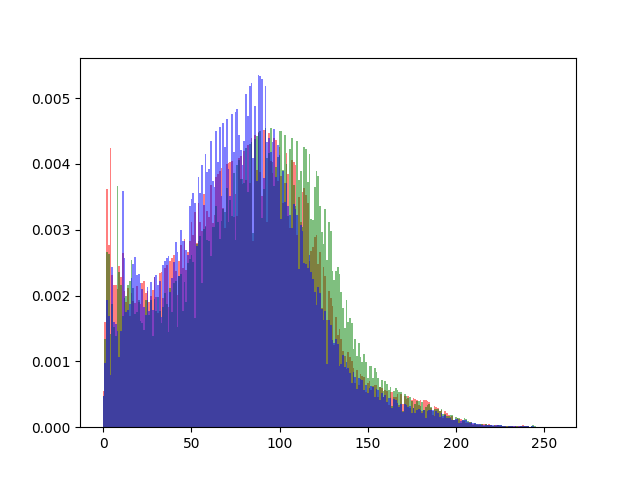

In [17]:
# Plot the histogram for the 10 images
plot_histogram(trainval_dataset[:10])

In [18]:
def describe_dataset(dataset):
    """
    Print image id and image shape and nb of labels per item
    Args:
        dataset:

    Returns:

    """
    for image_item in dataset:
        print("{} - {} - {}".format(image_item.image_id, image_item.shape, len(image_item.labels)))

In [19]:
describe_dataset(trainval_dataset)

USGS_ATL - (7852, 6689, 3) - 35
USGS_AUS - (7628, 6722, 3) - 63
USGS_BHM - (7544, 6416, 3) - 10
USGS_BOS - (7636, 6128, 3) - 61
USGS_BWI - (8302, 6408, 3) - 70
USGS_CLT - (7534, 6291, 3) - 88
USGS_CVG - (7677, 6190, 3) - 42
USGS_DSM - (8282, 6501, 3) - 3
USGS_EYW - (7679, 6572, 3) - 202
USGS_FAT - (4900, 5414, 3) - 53
USGS_FLG - (4940, 4141, 3) - 15
USGS_FLL - (7917, 6416, 3) - 39
USGS_FWA - (7710, 6820, 3) - 14
USGS_IAD - (7564, 6896, 3) - 141
USGS_IAH - (7676, 6800, 3) - 125
USGS_IND - (7581, 5868, 3) - 20
USGS_MDW - (7585, 5853, 3) - 40
USGS_MIA - (2377, 5669, 3) - 35
USGS_OAK - (7898, 6357, 3) - 102
USGS_OHR - (7596, 5854, 3) - 165
USGS_PHX - (7620, 6510, 3) - 58
USGS_SAN - (7590, 6000, 3) - 80
USGS_SEA - (7620, 5410, 3) - 54
USGS_SFO - (7885, 6357, 3) - 72
USGS_SJC - (7556, 6905, 3) - 212


## Some data visualisation
Let's plot an image (using khumeia helpers) and its labels

In [20]:
item = trainval_dataset[2]
print(item)
image = item.image
labels = item.labels

{
    "class": "SatelliteImage",
    "image_shape": [
        7544,
        6416,
        3
    ],
    "nb_labels": 10,
    "image_id": "USGS_BHM",
    "image_file": "../data/raw/trainval/USGS_BHM.jpg",
    "label_file": "../data/raw/trainval/USGS_BHM.json"
}


<IPython.core.display.Javascript object>


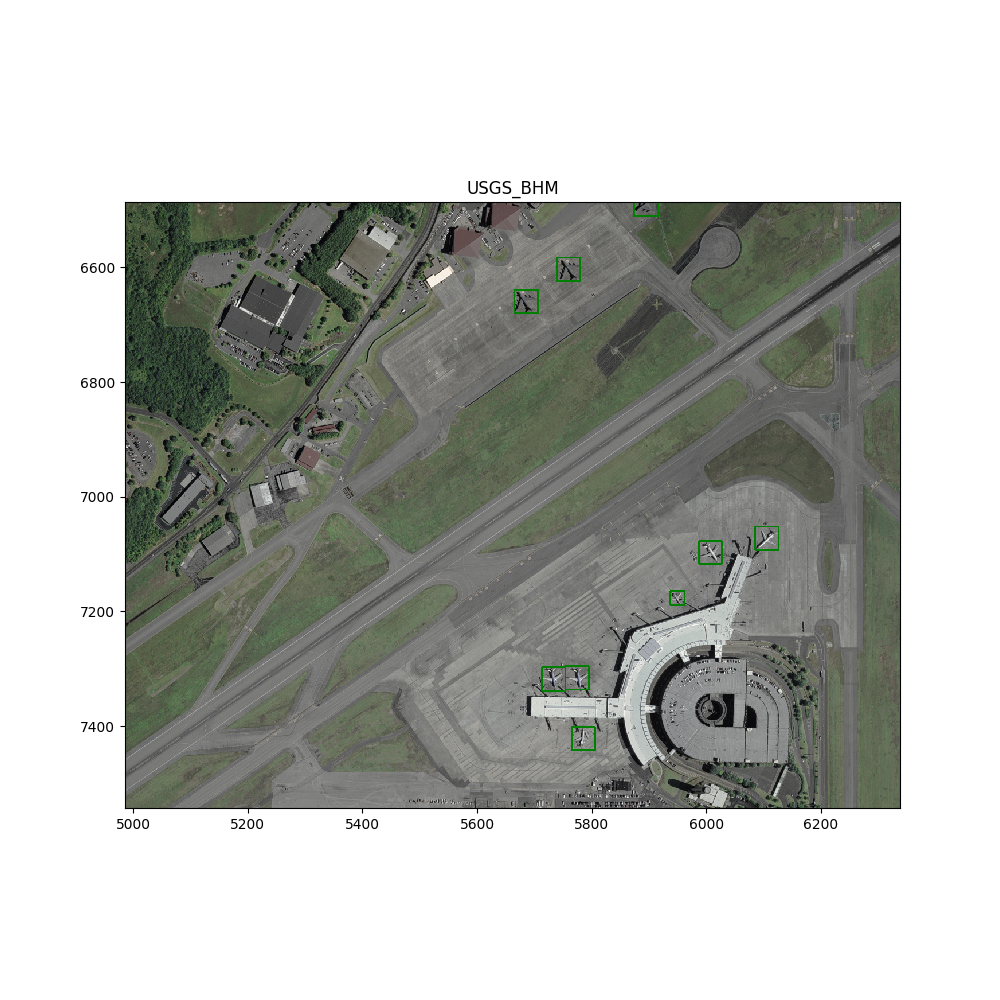

In [21]:
image = helpers.visualisation.draw_bboxes_on_image(image, labels, color="green")
plt.figure(figsize=(10, 10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()